https://seaborn.pydata.org/tutorial/relational.html

relplot() uses 2 approaches: scatter plots & line plots. relplot() combines a FacetGrid with one of two axes-level functions:

- scatterplot() (with kind="scatter"; the default)

- lineplot() (with kind="line")

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_theme(style='darkgrid')

### Relating variables with scatter plots

In [17]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


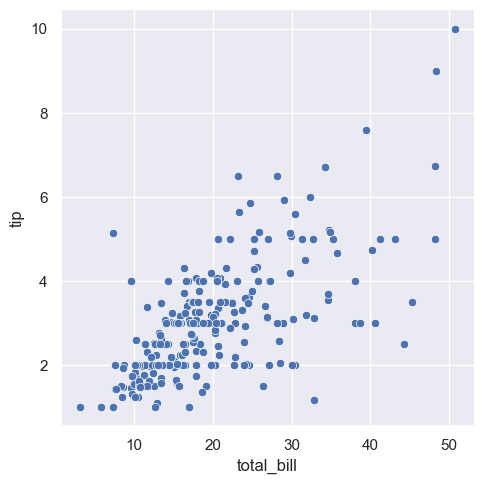

In [18]:
sns.relplot(data=tips, x='total_bill', y='tip')
plt.show()

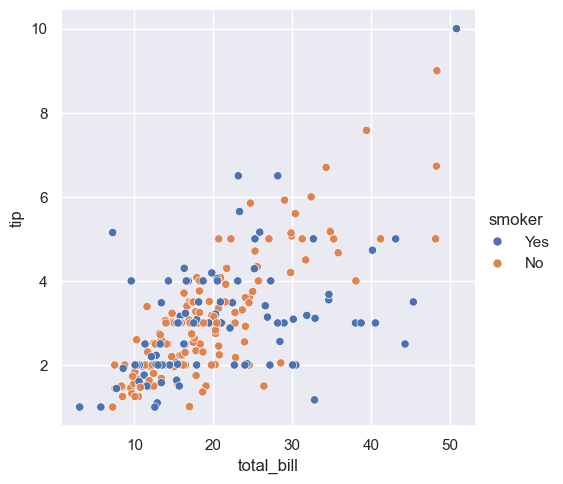

In [19]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker')
plt.show()

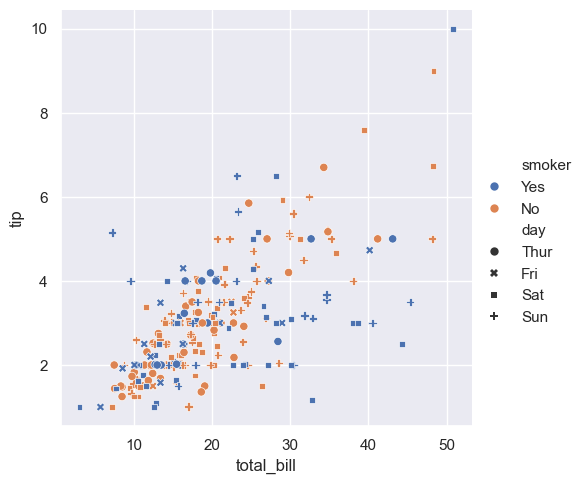

In [20]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='day')
plt.show()

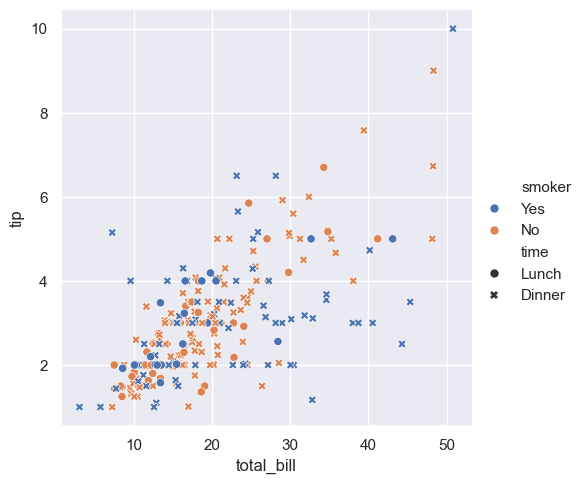

In [21]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', style='time')

in above examples, hue is in alphabetical form but in below example, it is in numeric form that is why the default coloring switches to a sequential palette.

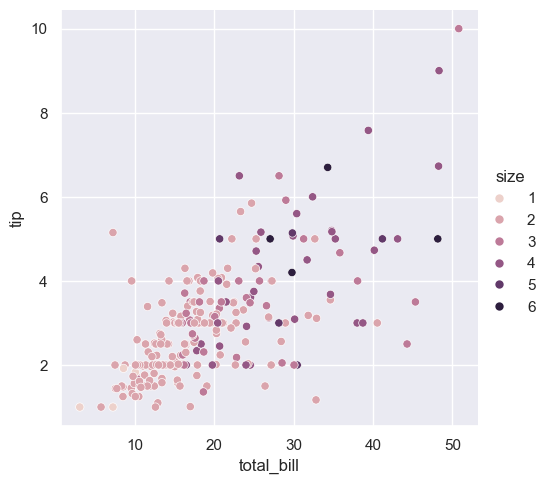

In [22]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='size')

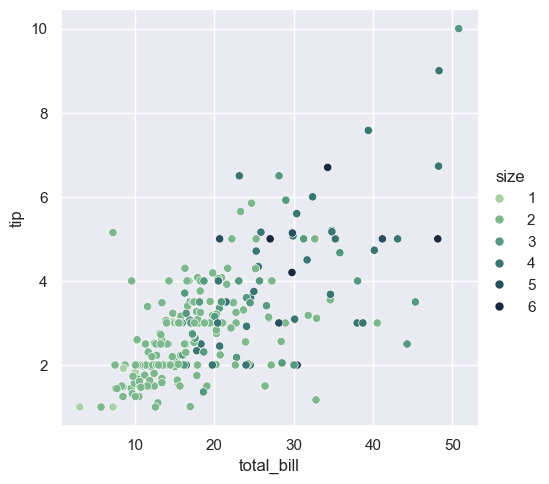

In [23]:
sns.relplot(data=tips, x='total_bill', y='tip', 
            hue='size', palette='ch: r=-.5, l=.75')

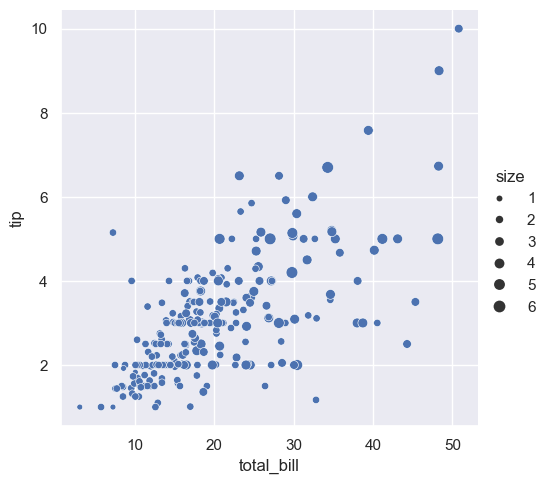

In [24]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

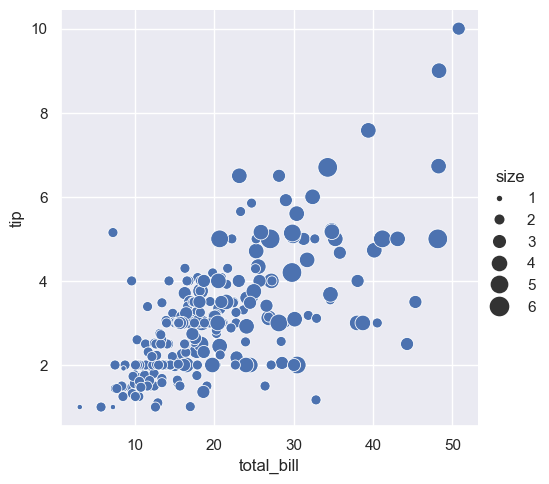

In [25]:
sns.relplot(data=tips, x='total_bill', y='tip', 
            size='size',sizes=(15, 200))

### Emphasizing continuity with line plots

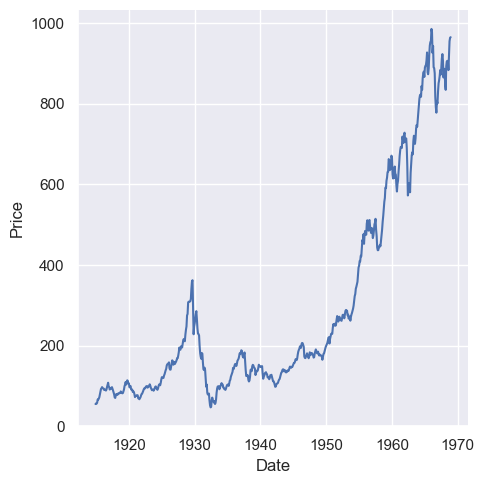

In [26]:
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind='line')

### Aggregation and representing uncertainty

In [27]:
# fmri = sns.load_dataset("frmi")
fmri = pd.read_csv('fmri.csv')

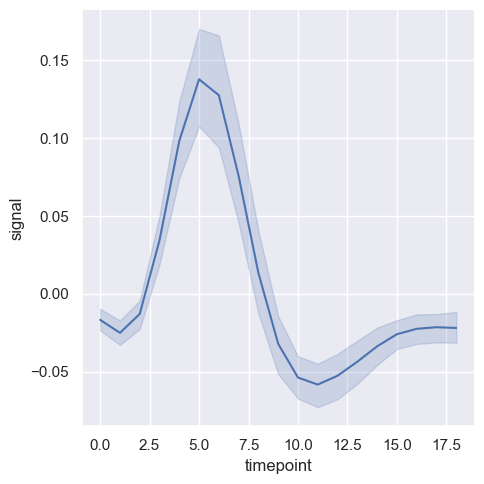

In [28]:
sns.relplot(data=fmri, x = 'timepoint', y = 'signal', kind = 'line')
plt.show()

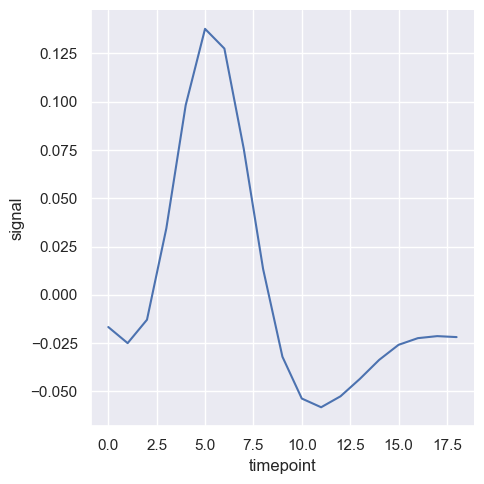

In [29]:
sns.relplot(data=fmri, x='timepoint', kind='line',
             y='signal', errorbar=None)
# errorbar = 'None' means confidence interval

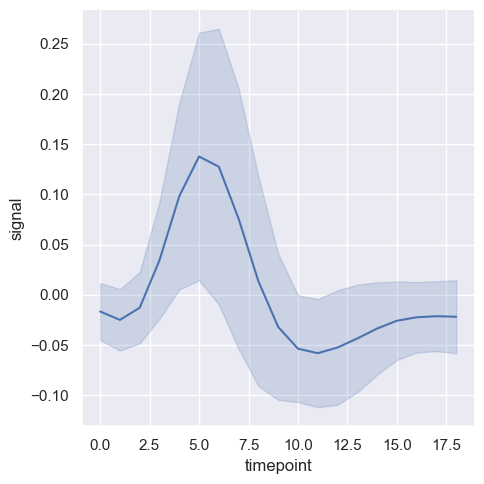

In [30]:
sns.relplot(data=fmri, x='timepoint', kind='line',
             y='signal', errorbar= 'sd')
#  errorbar= 'sd' means standard deviation

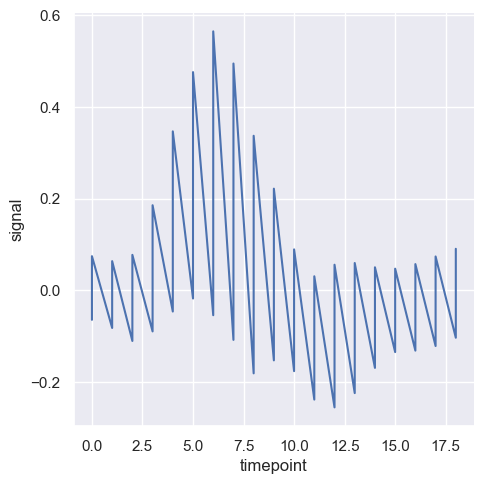

In [31]:
sns.relplot(data=fmri, x='timepoint', y='signal',
            kind='line', estimator=None)

### Plotting subsets of data with semantic mappings

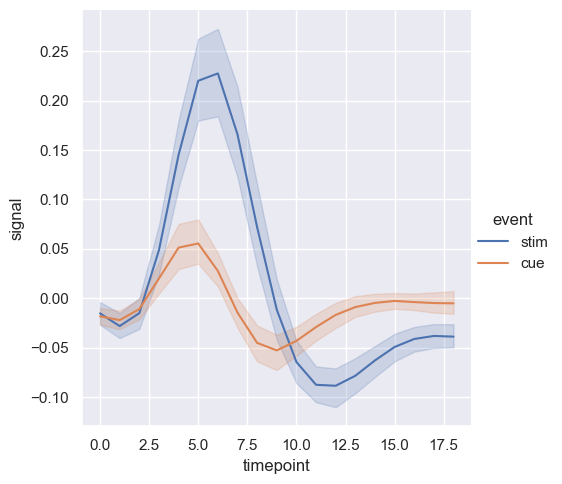

In [32]:
sns.relplot(data=fmri, x='timepoint', y='signal',
            kind='line', hue='event')

In [33]:
fmri['region'].unique()

array(['parietal', 'frontal'], dtype=object)

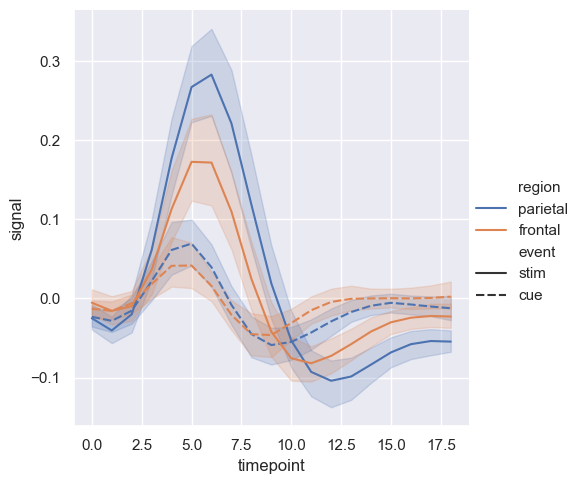

In [34]:
sns.relplot(data=fmri, x='timepoint', y='signal',
            kind='line', hue='region', style='event')

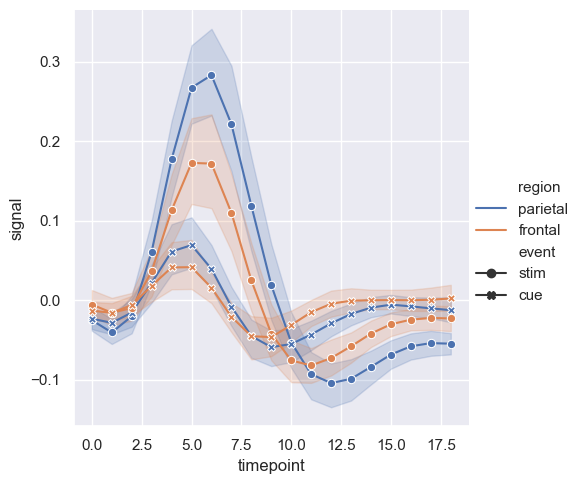

In [35]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="region", style="event",
    dashes=False, markers=True,
)

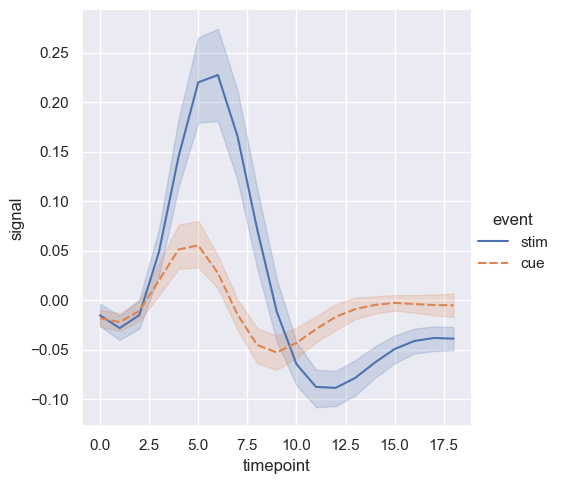

In [36]:
sns.relplot(data=fmri, x='timepoint', y='signal',
            kind='line', hue='event', style='event')

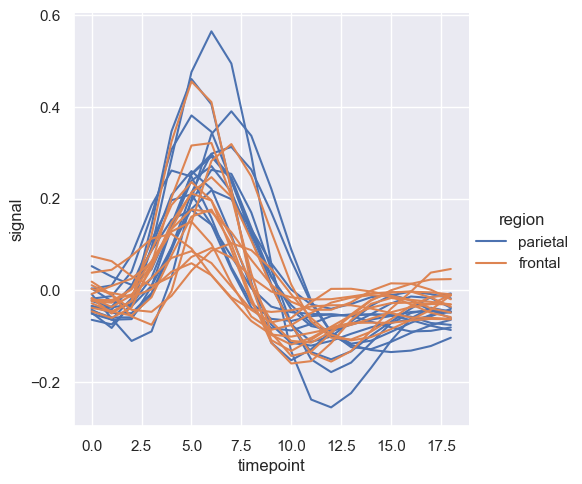

In [37]:
sns.relplot(data=fmri.query("event == 'stim'"), kind='line',
            x='timepoint', y='signal', hue='region', 
            units='subject', estimator=None)

In [38]:
dots = pd.read_csv('D:\seaborn-dataset\seaborn-data-master\dots.csv')

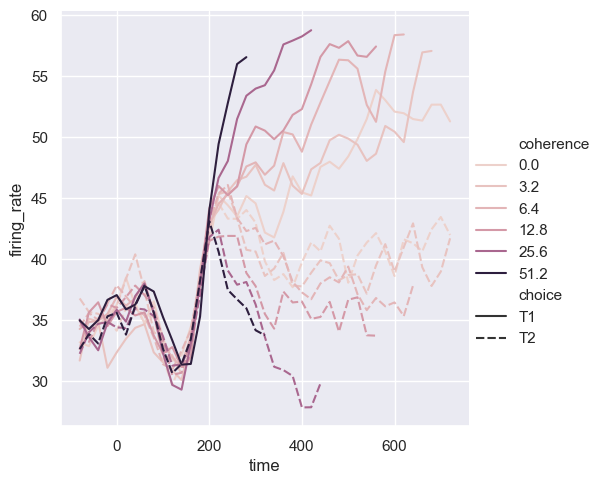

In [39]:
dots = dots.query("align == 'dots'")
sns.relplot(data=dots, x='time', y='firing_rate',
            kind='line', hue='coherence', style='choice')

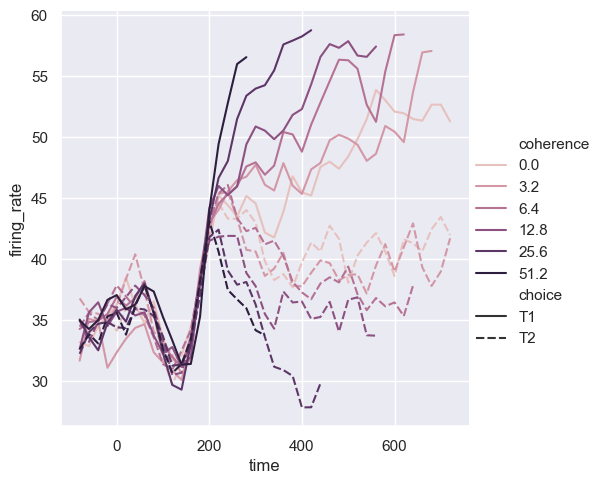

In [40]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice", palette=palette,
)

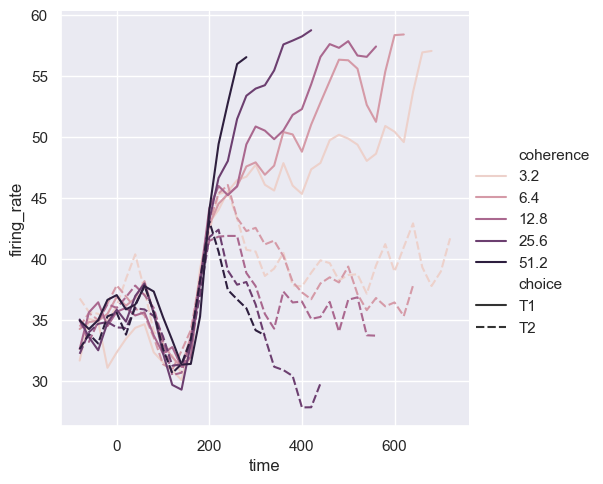

In [41]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(
    data=dots.query("coherence > 0"), kind="line",
    x="time", y="firing_rate",
    hue="coherence", style="choice",
    hue_norm=LogNorm(),
)

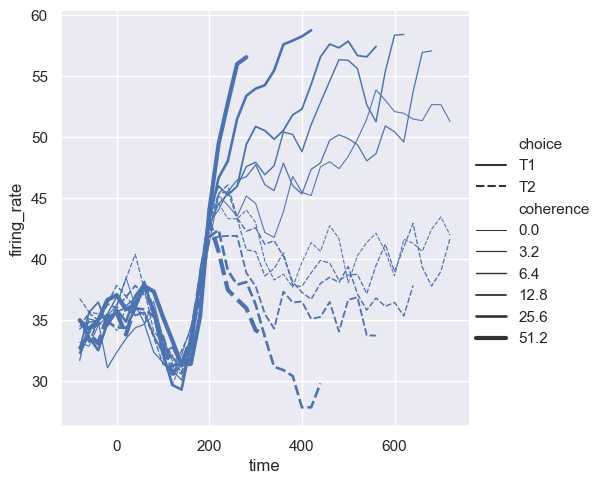

In [42]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    size="coherence", style="choice",
)

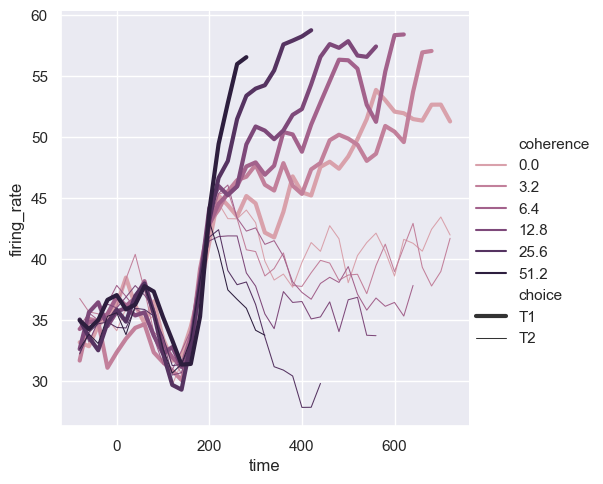

In [43]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate",
    hue="coherence", size="choice", palette=palette,
)

### Controlling sorting and orientation

In [53]:
healthexp = pd.read_csv('D:\seaborn-dataset\seaborn-data-master\healthexp.csv').sort_values('Year')

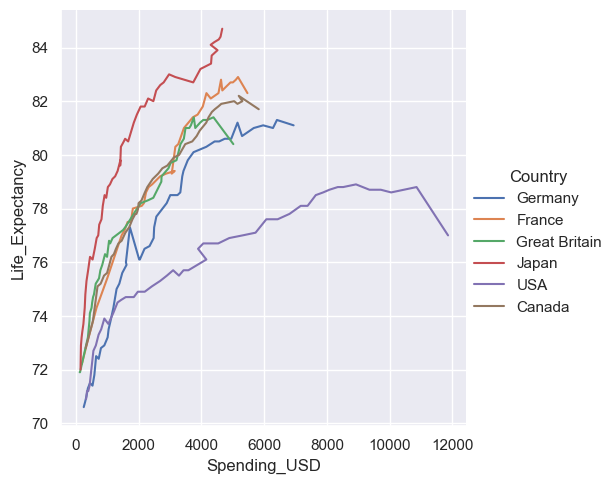

In [56]:
sns.relplot(
    data=healthexp, kind="line",
    x="Spending_USD", y="Life_Expectancy", hue="Country",
    sort=False
)

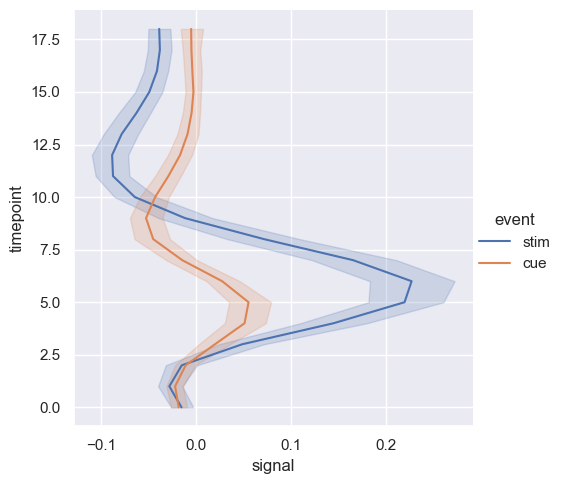

In [60]:
sns.relplot(
    data=fmri, kind="line",
     x="signal", y="timepoint", hue="event",
    orient="y",
)

### Showing multiple relationships with facets

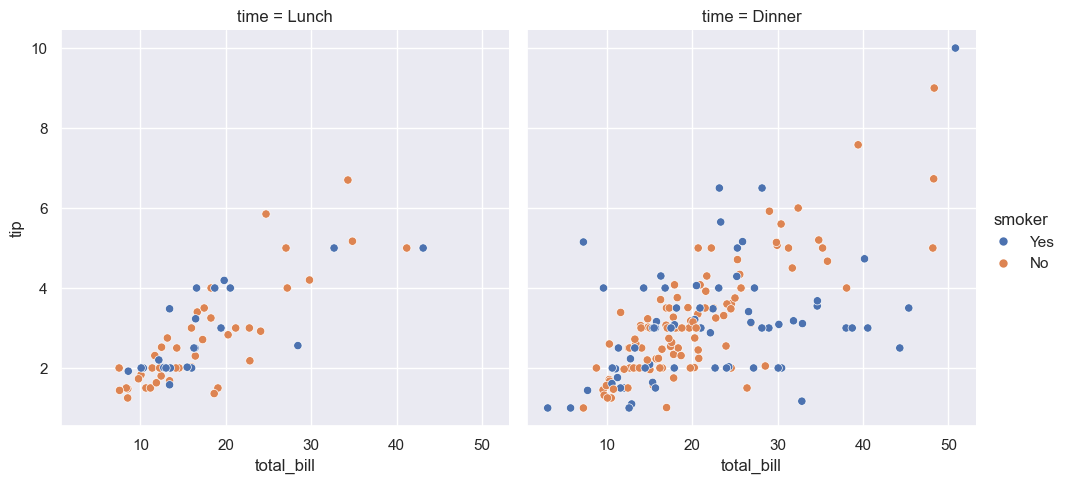

In [63]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", col="time",
)

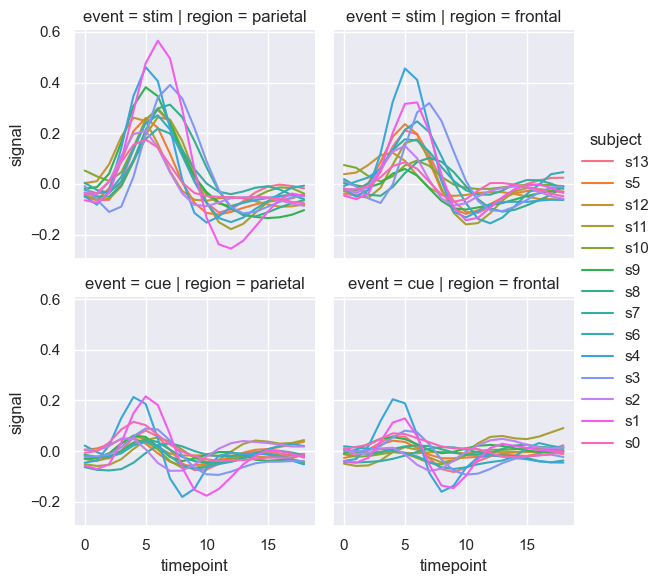

In [74]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", hue="subject",
    col="region", row="event", height=3,
    estimator=None
)

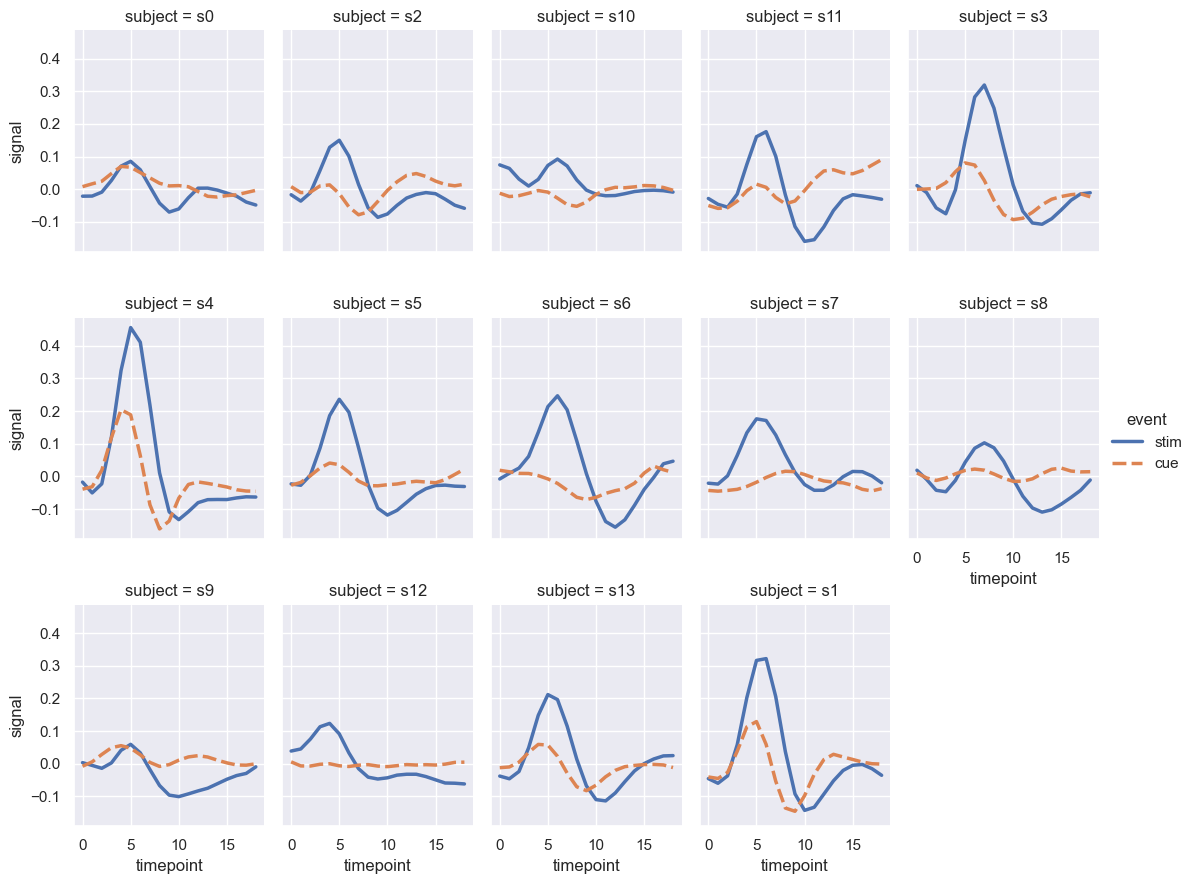

In [75]:
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)